<a href="https://colab.research.google.com/github/md-kasim/tf/blob/master/UseOfDropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 3.8MB 32.6MB/s 
     |████████████████████████████████| 450kB 49.2MB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.1 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.6.3 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found exist

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Counting objects: 100% (25027/25027), done.
remote: Compressing objects: 100% (25022/25022), done.
remote: Total 25027 (delta 5), reused 25020 (delta 3), pack-reused 0
Receiving objects: 100% (25027/25027), 541.62 MiB | 38.45 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [0]:
test_data_dir = '/content/dog-cat-full-dataset/data/test'
train_data_dir = '/content/dog-cat-full-dataset/data/train'

In [0]:
img_width = 32
img_height = 32
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale=1.0/255.0)

In [8]:
train_generator = datagen.flow_from_directory(directory=train_data_dir,
                                              target_size=(img_width, img_width),
                                              classes=['dogs', 'cats'],
                                              class_mode='binary',
                                              batch_size=batch_size)

Found 20000 images belonging to 2 classes.


In [9]:
train_generator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [10]:
validation_generator = datagen.flow_from_directory(directory=test_data_dir,
                                                   target_size=(img_width, img_height),
                                                   classes=['dogs','cats'],
                                                   class_mode='binary',
                                                   batch_size=batch_size)

Found 5000 images belonging to 2 classes.


In [11]:
len(train_generator)

1000

### Build CNN Model

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform', input_shape=(img_width, img_height, 3)))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose=1)

Epoch 1/5
1000/1000 [==============================] - 80s 80ms/step - loss: 0.6808 - accuracy: 0.5543 - val_loss: 0.6208 - val_accuracy: 0.6510
Epoch 2/5
1000/1000 [==============================] - 77s 77ms/step - loss: 0.5744 - accuracy: 0.6977 - val_loss: 0.5264 - val_accuracy: 0.7374
Epoch 3/5
1000/1000 [==============================] - 77s 77ms/step - loss: 0.5217 - accuracy: 0.7430 - val_loss: 0.5408 - val_accuracy: 0.7250
Epoch 4/5
1000/1000 [==============================] - 76s 76ms/step - loss: 0.4869 - accuracy: 0.7643 - val_loss: 0.5247 - val_accuracy: 0.7388
Epoch 5/5
1000/1000 [==============================] - 76s 76ms/step - loss: 0.4538 - accuracy: 0.7860 - val_loss: 0.5190 - val_accuracy: 0.7468


In [15]:
history.history

{'accuracy': [0.5543, 0.6977, 0.74295, 0.7643, 0.786],
 'loss': [0.6808337732553482,
  0.5743960431665183,
  0.5216710804998874,
  0.4869431433230639,
  0.45380974759161474],
 'val_accuracy': [0.651, 0.7374, 0.725, 0.7388, 0.7468],
 'val_loss': [0.6207938420772553,
  0.5263663500547409,
  0.5408202960491181,
  0.5247094528079033,
  0.5189532552957534]}

In [0]:
def plot_learning_curve(history, epoch):
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()

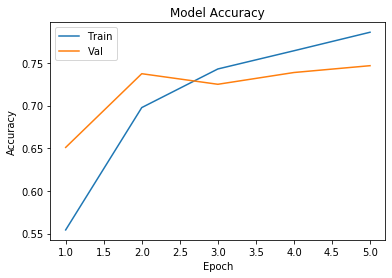

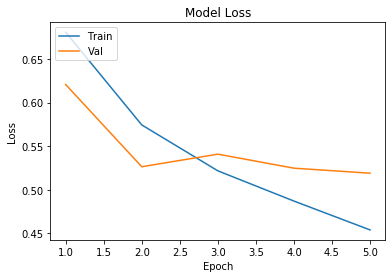

In [17]:
plot_learning_curve(history, 5)

### Implement first 3 blocks of VGG16

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform', input_shape=(img_width, img_height, 3)))
model.add(MaxPool2D(2,2))

model = Sequential()
model.add(Conv2D(filters=128, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model = Sequential()
model.add(Conv2D(filters=256, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=5, validation_data=validation_generator, validation_steps=len(validation_generator), verbose=1)

Epoch 1/5
1000/1000 [==============================] - 79s 79ms/step - loss: 0.7007 - accuracy: 0.4967 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/5
1000/1000 [==============================] - 78s 78ms/step - loss: 0.6935 - accuracy: 0.5058 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
1000/1000 [==============================] - 78s 78ms/step - loss: 0.6932 - accuracy: 0.5139 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/5
1000/1000 [==============================] - 78s 78ms/step - loss: 0.6936 - accuracy: 0.4954 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 5/5
1000/1000 [==============================] - 78s 78ms/step - loss: 0.6934 - accuracy: 0.5054 - val_loss: 0.6934 - val_accuracy: 0.5000


### Batch Normalization and Drop out

In [0]:
model = Sequential()
model.add(Conv2D(filters=64, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform', input_shape=(img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model = Sequential()
model.add(Conv2D(filters=128, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model = Sequential()
model.add(Conv2D(filters=256, activation='relu', kernel_size=(3,3), padding='same', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit_generator(generator=train_generator, steps_per_epoch=len(train_generator), epochs=10, validation_data=validation_generator, validation_steps=len(validation_generator), verbose=1)

Epoch 1/10
1000/1000 [==============================] - 91s 91ms/step - loss: 0.6681 - accuracy: 0.6160 - val_loss: 0.5785 - val_accuracy: 0.6876
Epoch 2/10
1000/1000 [==============================] - 91s 91ms/step - loss: 0.5941 - accuracy: 0.6952 - val_loss: 0.5380 - val_accuracy: 0.7402
Epoch 3/10
1000/1000 [==============================] - 90s 90ms/step - loss: 0.5529 - accuracy: 0.7241 - val_loss: 0.5016 - val_accuracy: 0.7584
Epoch 4/10
1000/1000 [==============================] - 91s 91ms/step - loss: 0.5282 - accuracy: 0.7424 - val_loss: 0.5250 - val_accuracy: 0.7422
Epoch 5/10
1000/1000 [==============================] - 90s 90ms/step - loss: 0.5120 - accuracy: 0.7507 - val_loss: 0.4948 - val_accuracy: 0.7638
Epoch 6/10
1000/1000 [==============================] - 90s 90ms/step - loss: 0.4873 - accuracy: 0.7751 - val_loss: 0.5133 - val_accuracy: 0.7520
Epoch 7/10
1000/1000 [==============================] - 91s 91ms/step - loss: 0.4810 - accuracy: 0.7746 - val_loss: 0.5257 -

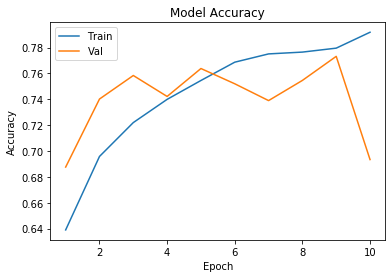

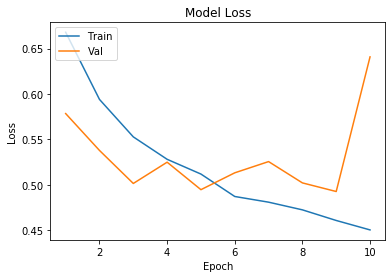

In [24]:
plot_learning_curve(history, 10)